In [14]:
from pyMez import *
from Code.Analysis.SParameter import unwrap_phase

In [2]:
summary_directory=r"C:\Share\AWG_Phase_Calibration\Summary_Files\Zero_Phase"
summary_file_names=[]
for file_name in os.listdir(summary_directory):
    if re.search("txt",file_name):
        summary_file_names.append(file_name)
summary_file_names=map(lambda x: os.path.join(summary_directory,x),summary_file_names)
summary_files=map(lambda x: AsciiDataTable(x,**read_schema(change_extension(x,new_extension="schema"))),summary_file_names)

In [3]:
summary_files[0]

In [25]:
def plot_all_tones(summary_file_model):
    """Plots the measured phase against the AWG set phase for all tones in the summary file"""
    for tone_index in range(11):
        start_index=tone_index*(10)
        stop_index=tone_index*(10)+10
        x_data=summary_file_model["AWG_Set_Phase"][start_index:stop_index]
        #corrected_list=360+np.array(summary["Vna_Phase"][8:10])
        vna_data=summary_file_model["Vna_Phase"][start_index:stop_index]
        #corrected_scope_list=180+np.array(summary["Scope_Phase"][5:10])
        scope_data=summary_file_model["Scope_Phase"][start_index:stop_index]
        plt.plot(x_data,vna_data,'bo',label="VNA")
        plt.plot(x_data,scope_data,'r^',label="Oscilloscope")
        #plt.plot(x_data,summary_file_model["Vna_Comb_Referenced_Phase"][start_index:stop_index],'gs',label="VNA Comb Reference")
        plt.legend()
        plt.xlabel("AWG Set Phase (Degrees)")
        plt.ylabel("Measured Phase (Degrees)")
        plt.title(r"$Tone : {0}/11, F_0 = 1 GHz, \Delta F={1:.1e} Hz$".format(tone_index+1,summary_file_model.metadata["tone_spacing"]))
        #plt.savefig(r'Q:\public\Aric\AWG_Phase_Calibration_20180927\11_Tones_10000000000KHz_Spacing\{0}_{1}.png'.format(format(tone_index+1)))
        plt.show()

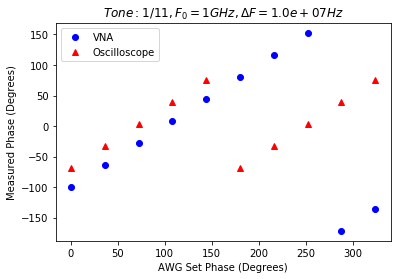

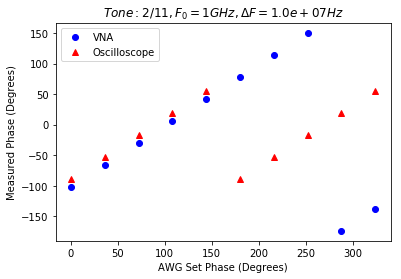

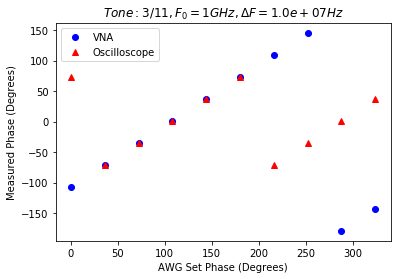

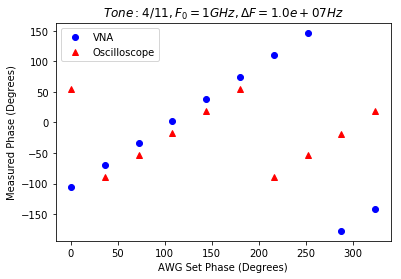

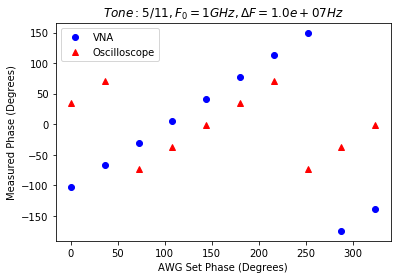

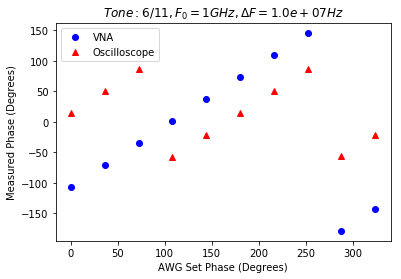

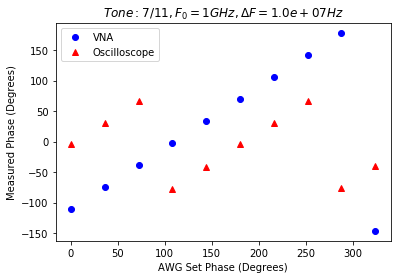

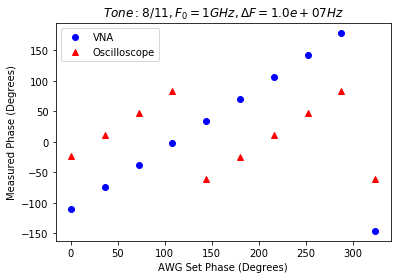

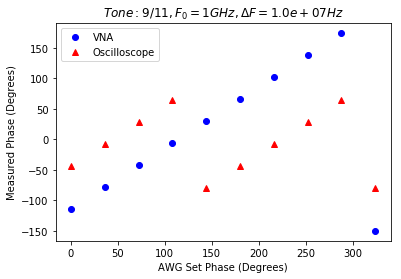

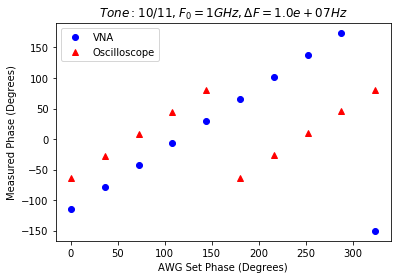

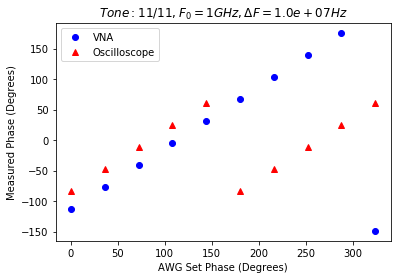

In [52]:
plot_all_tones(summary_files[0])

In [7]:
summary_files[1].metadata

{'Timestamp': '2018-10-05 15:31:30.662000',
 'frequnecy_list': [987500000.0,
  990000000.0,
  992500000.0,
  995000000.0,
  997500000.0,
  1000000000.0,
  1002500000.0,
  1005000000.0,
  1007500000.0,
  1010000000.0,
  1012500000.0],
 'multisine_phase': 'zero',
 'number_harmonics': 1,
 'number_tones': 11,
 'sweep': '11_Tones_2500000000KHz_Spacing',
 'tone_spacing': 2500000.0}

TypeError: 'slice' object is not iterable

In [67]:
def fix_phase(phase_list):
    
    last_phase=phase_list[0]
    new_phase_list=[last_phase]
    for phase in phase_list[1:]:
        phase_offset=phase-last_phase
        #print("Phase Offset is {0}".format(phase_offset))
        if 90<phase_offset<270:

            new_phase=phase-180
        elif -90>phase_offset>-270:
            new_phase=phase+180
        elif -270>phase_offset:
            new_phase=phase+360
        else:
            new_phase=phase
        #print(" New Phase is {0}, Old Phase is {1}".format(new_phase,phase))
        new_phase_list.append(new_phase)
        last_phase=new_phase
    return new_phase_list
        
            

Phase Offset is 36.0087929833
 New Phase is -32.3167643891, Old Phase is -32.3167643891
Phase Offset is 36.0168590473
 New Phase is 3.7000946582, Old Phase is 3.7000946582
Phase Offset is 36.0935368723
 New Phase is 39.7936315305, Old Phase is 39.7936315305
Phase Offset is 35.8443484014
 New Phase is 75.6379799319, Old Phase is 75.6379799319
Phase Offset is -143.920563736
 New Phase is 111.717416196, Old Phase is -68.2825838037
Phase Offset is -143.912935243
 New Phase is 147.804480954, Old Phase is -32.1955190464
Phase Offset is -143.896280573
 New Phase is 183.90820038, Old Phase is 3.90820038022
Phase Offset is -143.996222119
 New Phase is 219.911978261, Old Phase is 39.9119782612
Phase Offset is -143.911380353
 New Phase is 256.000597908, Old Phase is 76.0005979084
Phase Offset is -344.501184166
 New Phase is 271.499413742, Old Phase is -88.5005862578
Phase Offset is -324.124724496
 New Phase is 307.374689246, Old Phase is -52.6253107535
Phase Offset is -323.94572986
 New Phase is 

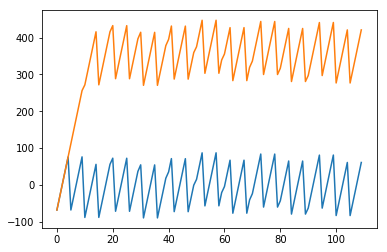

In [64]:
plt.plot(summary_files[0]["Scope_Phase"])
plt.plot(fix_phase(summary_files[0]["Scope_Phase"]))
plt.show()

In [68]:
def plot_all_tones_fix_phase(summary_file_model):
    """Plots the measured phase against the AWG set phase for all tones in the summary file"""
    for tone_index in range(11):
        start_index=tone_index*(10)
        stop_index=tone_index*(10)+10
        x_data=summary_file_model["AWG_Set_Phase"][start_index:stop_index]
        #corrected_list=360+np.array(summary["Vna_Phase"][8:10])
        vna_data=fix_phase(summary_file_model["Vna_Phase"][start_index:stop_index])
        #corrected_scope_list=180+np.array(summary["Scope_Phase"][5:10])
        scope_data=fix_phase(summary_file_model["Scope_Phase"][start_index:stop_index])
        plt.plot(x_data,vna_data,'bo',label="VNA")
        plt.plot(x_data,scope_data,'r^',label="Oscilloscope")
        #plt.plot(x_data,summary_file_model["Vna_Comb_Referenced_Phase"][start_index:stop_index],'gs',label="VNA Comb Reference")
        plt.legend()
        plt.xlabel("AWG Set Phase (Degrees)")
        plt.ylabel("Measured Phase (Degrees)")
        plt.title(r"$Tone : {0}/11, F_0 = 1 GHz, \Delta F={1:.1e} Hz$".format(tone_index+1,summary_file_model.metadata["tone_spacing"]))
        #plt.savefig(r'Q:\public\Aric\AWG_Phase_Calibration_20180927\11_Tones_10000000000KHz_Spacing\{0}_{1}.png'.format(format(tone_index+1)))
        plt.show()

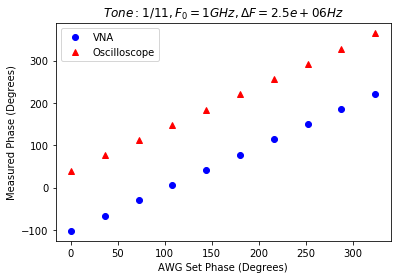

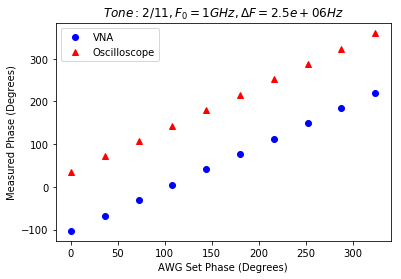

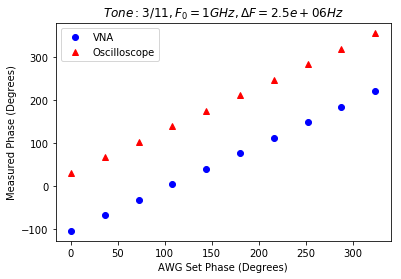

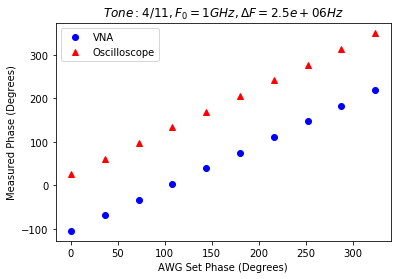

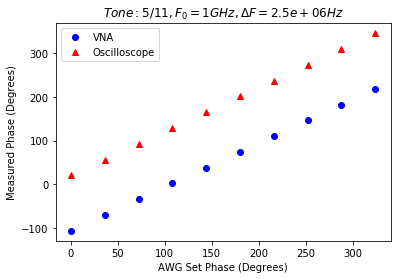

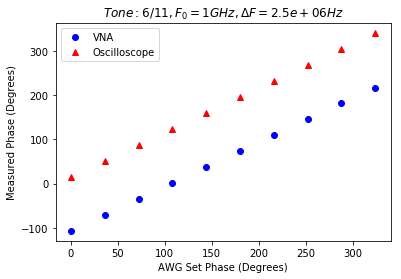

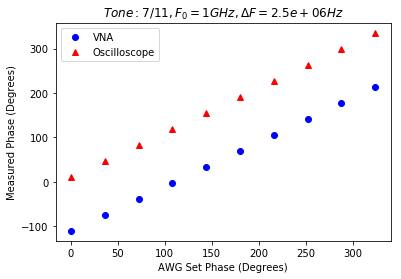

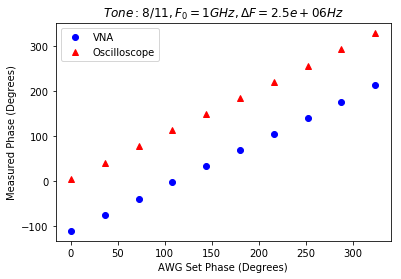

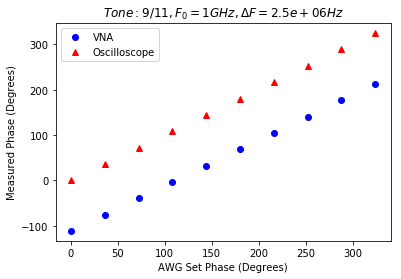

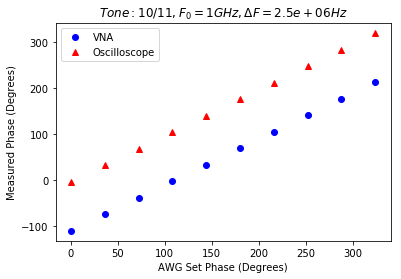

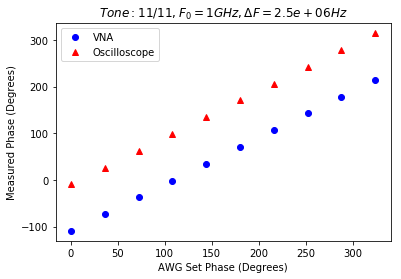

In [70]:
plot_all_tones_fix_phase(summary_files[1])

In [80]:
def plot_all_tones_fix_phase_difference(summary_file_model):
    """Plots the measured phase against the AWG set phase for all tones in the summary file"""
    for tone_index in range(11):
        start_index=tone_index*(10)
        stop_index=tone_index*(10)+10
        x_data=summary_file_model["AWG_Set_Phase"][start_index:stop_index]
        #corrected_list=360+np.array(summary["Vna_Phase"][8:10])
        vna_data=np.array(fix_phase(summary_file_model["Vna_Phase"][start_index:stop_index]))
        #corrected_scope_list=180+np.array(summary["Scope_Phase"][5:10])
        scope_data=np.array(fix_phase(summary_file_model["Scope_Phase"][start_index:stop_index]))
        plt.plot(x_data,scope_data-vna_data,'bo',
                 label="Difference (Scope-VNA) Mean: {0:3.2f} Std:{1:3.2f}".format(np.mean(scope_data-vna_data),
                                                                                                                np.std(scope_data-vna_data)))
        #plt.plot(x_data,summary_file_model["Vna_Comb_Referenced_Phase"][start_index:stop_index],'gs',label="VNA Comb Reference")
        plt.legend()
        plt.xlabel("AWG Set Phase (Degrees)")
        plt.ylabel("Measured Phase (Degrees)")
        plt.title(r"$Tone : {0}/11, F_0 = 1 GHz, \Delta F={1:.1e} Hz$".format(tone_index+1,
                                                                              summary_file_model.metadata["tone_spacing"]))
        #plt.savefig(r'Q:\public\Aric\AWG_Phase_Calibration_20180927\11_Tones_10000000000KHz_Spacing\{0}_{1}.png'.format(format(tone_index+1)))
        plt.show()

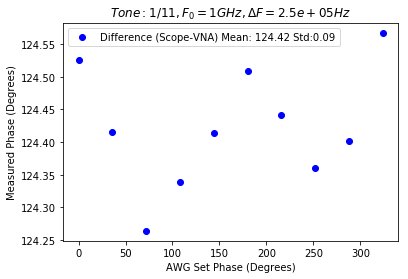

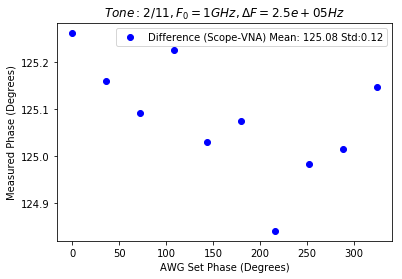

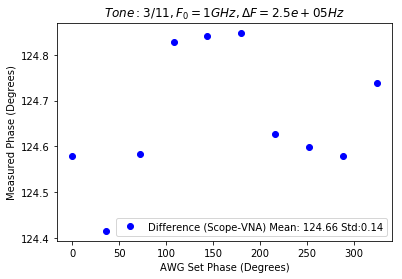

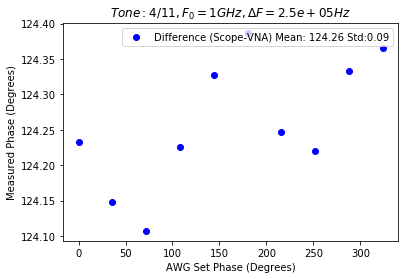

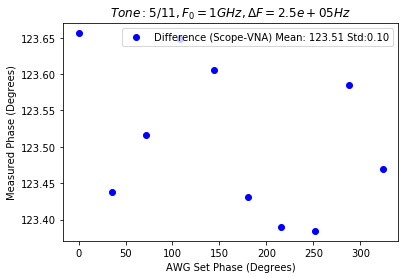

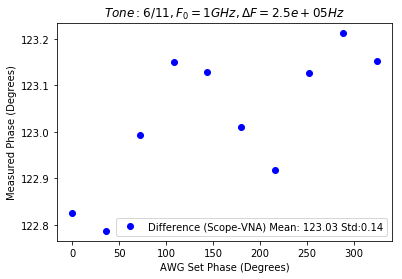

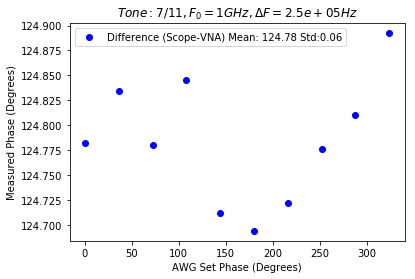

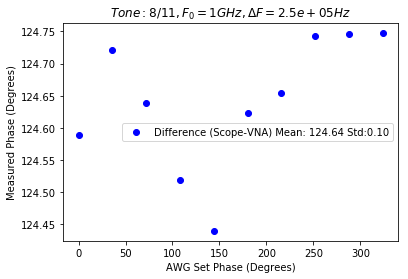

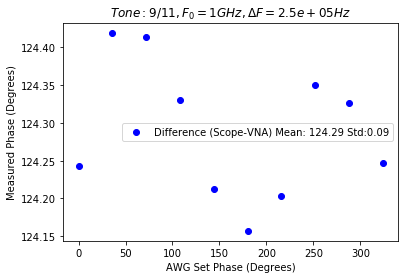

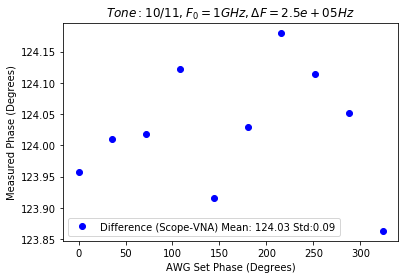

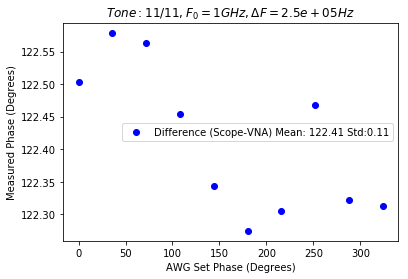

In [82]:
plot_all_tones_fix_phase_difference(summary_files[2])